In [2]:
from urllib.request import urlopen
import json
import re
from urllib.parse import quote
import pandas as pd
from pandas.io.json import json_normalize
import collections
import itertools
import networkx as nx
import matplotlib.pyplot as plt
from fa2 import ForceAtlas2
import numpy as np
import datetime
# conda install -c phlya adjusttext 
#from adjustText import adjust_text

,creation_date,desc,domain,flags,founding_user_id,headline,hub,id,image,lang,language,name,original_dimensions,stats,title,topUsers,topic,url,wam_score,wordmark
0,2013-02-14 11:25:40,"""Old School RuneScape"" is Jagex's official ter...",oldschoolrunescape.wikia.com,[],1649337,Welcome to the Old School RuneScape Wiki,Games,691244,https://images.wikia.nocookie.net/__cb20170706...,en,en,Old School RuneScape Wiki,"{'width': 480, 'height': 320}","{'edits': 7425610, 'articles': 19813, 'pages':...",Old School RuneScape Wiki,"[3044102, 1759647, 4097547, 26578522, 8306, 50...",Gaming,http://oldschoolrunescape.wikia.com,95.5018,https://vignette.wikia.nocookie.net/2007scape/...
1,2005-02-07 06:40:52,Created and maintained by the Fallout communit...,fallout.wikia.com,[],0,Nukapedia - The Fallout Wiki,Games,3035,https://images.wikia.nocookie.net/__cb20170307...,en,en,Fallout Wiki,"{'width': 1751, 'height': 1337}","{'edits': 2925242, 'articles': 27381, 'pages':...",Fallout Wiki,"[3183960, 27868532, 3076045, 31775388, 4286974...",Gaming,http://fallout.wikia.com,99.7960,https://vignette.wikia.nocookie.net/fallout/im...
2,2009-06-16 17:10:14,Red Dead Wiki is a community-built site about ...,reddead.wikia.com,[],131372,Welcome to the Red Dead Wiki!,Games,30404,https://images.wikia.nocookie.net/__cb20161102...,en,en,Red Dead Wiki,"{'width': 480, 'height': 360}","{'edits': 334118, 'articles': 2621, 'pages': 8...",Red Dead Wiki,"[1376364, 28191207, 4090850, 33558234, 2735137...",Gaming,http://reddead.wikia.com,99.4347,https://vignette.wikia.nocookie.net/reddeadred...
3,2006-03-29 02:45:59,"The Elder Scrolls Wiki consists of over 60,000...",elderscrolls.wikia.com,[],0,The Elder Scrolls Wiki,Games,1706,https://images.wikia.nocookie.net/__cb20170307...,en,en,Elder Scrolls,"{'width': 1800, 'height': 1565}","{'edits': 2776470, 'articles': 61679, 'pages':...",Elder Scrolls,"[32045548, 25356303, 17401442, 30169600, 26074...",Gaming,http://elderscrolls.wikia.com,99.5703,https://vignette4.wikia.nocookie.net/elderscro...
4,2005-05-26 11:44:29,Yu-Gi-Oh! Wikia is a database on Konami's Yu-G...,yugioh.wikia.com,[],310,Yu-Gi-Oh! Wikia,Games,410,https://images.wikia.nocookie.net/__cb20161102...,en,en,Yu-Gi-Oh!,"{'width': 320, 'height': 320}","{'edits': 3993815, 'articles': 108240, 'pages'...",Yu-Gi-Oh!,"[3040170, 4129195, 3545725, 5452442, 3564254, ...",Anime,http://yugioh.wikia.com,99.4536,https://img3.wikia.nocookie.net/__cb2014041821...
5,2004-11-11 23:33:14,Wookieepedia is an online encyclopedia that co...,starwars.wikia.com,[],2041,"Wookieepedia, the Star Wars Wiki",Movies,147,https://images.wikia.nocookie.net/__cb20061211...,en,en,Wookieepedia,"{'width': 1042, 'height': 1042}","{'edits': 7941654, 'articles': 145786, 'pages'...",Wookieepedia,"[24962224, 27768064, 24165583, 7090787, 309238...",Entertainment,http://starwars.wikia.com,99.7613,https://img3.wikia.nocookie.net/__cb2015010101...
6,2012-06-01 18:53:17,Warframe Wiki is a player supported encycloped...,warframe.fandom.com,[],5156670,Discover the mysteries of the Tenno.,Games,544934,https://images.wikia.nocookie.net/__cb20161102...,en,en,WARFRAME Wiki,"{'width': 1920, 'height': 1145}","{'edits': 1845700, 'articles': 4566, 'pages': ...",WARFRAME Wiki,"[25254386, 34103815, 14475, 26061294, 15339176...",Gaming,https://warframe.fandom.com,99.7302,https://vignette4.wikia.nocookie.net/warframe/...
7,2005-04-08 07:30:06,"Started in April of 2005, the RuneScape Wiki's...",runescape.fandom.com,[],2648,The RuneScape Wiki,Games,304,https://images.wikia.nocookie.net/__cb20181004...,en,en,RuneScape Wiki,"{'width': 192, 'height': 192}","{'edits': 23434134, 'articles': 43969, 'pages'...",RuneScape Wiki,"[3044102, 19402885, 32232648, 9852177, 3373504...",Gaming,https://runescape.fandom.com,90.7248,https://vignette.wikia.nocookie.net/runescape2...
8,2005-07-04 03:57:32,Harry Potter Wiki is a collaborative knowledge...,harrypotter.wikia.com,[],3676,Harry Potter Wiki,Books,509,https://images.wikia.nocookie.net/__cb20170

full data set has 2030 data, while only 262 is actively used.

0 af 2304, wikicount= 262
 - UsersNotFound: 1, wikisNotFound: 0, infoFound: 0
 - UsersAddedToWiki: 0, newWikisFound: 0, usersAddedToNewWikis: 0
25 af 2304, wikicount= 262
 - UsersNotFound: 25, wikisNotFound: 0, infoFound: 0
 - UsersAddedToWiki: 0, newWikisFound: 0, usersAddedToNewWikis: 0
50 af 2304, wikicount= 842
 - UsersNotFound: 24, wikisNotFound: 0, infoFound: 1
 - UsersAddedToWiki: 6, newWikisFound: 5048, usersAddedToNewWikis: 0
75 af 2304, wikicount= 842
 - UsersNotFound: 24, wikisNotFound: 0, infoFound: 1
 - UsersAddedToWiki: 11, newWikisFound: 4977, usersAddedToNewWikis: 0
100 af 2304, wikicount= 842
 - UsersNotFound: 25, wikisNotFound: 0, infoFound: 0
 - UsersAddedToWiki: 0, newWikisFound: 0, usersAddedToNewWikis: 0
125 af 2304, wikicount= 842
 - UsersNotFound: 24, wikisNotFound: 0, infoFound: 1
 - UsersAddedToWiki: 11, newWikisFound: 4977, usersAddedToNewWikis: 0
150 af 2304, wikicount= 842
 - UsersNotFound: 25, 

URLError: <urlopen error [Errno 65] No route to host>

[(30169600, 75), (34077440, 72), (24383490, 72), (10637, 72), (1940096, 71), (25646820, 71), (27075564, 71)]
6172


In [19]:
# get wikis/dataset from csv


# Make graph
G = nx.Graph()

# add nodes
for wiki in dataSet["name"]:
    G.add_node(wiki, hub=set(dataSet['hub'].loc[dataSet['name'] ==wiki].values))

In [20]:
# find the wiki names of the users
users = {}
filename = "data/users/user-wikis.txt"
f = open(filename, "r")
for line in f.readlines():
    wikiNames.append(line.replace("\n",""))
    
f.close() 


for user in counter.most_common(): #most_common virker ikek
    user = user[0]
    for k, v in activeDataSet.T.items():
        if user in v["topUsers"]:
            if user not in users:
                users[user] = []
            users[user].append(v['name'])

In [21]:
# create edges between all wikis which share users
def createEdges(G,userWikis):
    length = len(userWikis)
    if length==1:
        return G
    elif length>1:
        wiki = userWikis.pop()
        for w in userWikis:
            if G.has_edge(wiki, w):
                G[wiki][w]['weight']+=1
            else:
                G.add_edge(wiki,w,weight=1)
        return createEdges(G,userWikis)
    else:
        return G

In [22]:
# iterate over all users
for k,v in users.items():
    #print(set(v))
    G = createEdges(G,set(v))

In [23]:
# Set layout
forceatlas2 = ForceAtlas2(
                          # Behavior alternatives
                          outboundAttractionDistribution=False,  # Dissuade hubs
                          linLogMode=False,  # NOT IMPLEMENTED
                          adjustSizes=False,  # Prevent overlap (NOT IMPLEMENTED)
                          edgeWeightInfluence=1,

                          # Performance
                          jitterTolerance=0.5,  #1 # Tolerance
                          barnesHutOptimize=True,
                          barnesHutTheta=1.2,
                          multiThreaded=False,  # NOT IMPLEMENTED

                          # Tuning
                          scalingRatio=0.01, #0.01
                          strongGravityMode=False, #False
                          gravity=30, #15

                          # Log
                          verbose=True)


# Calculate Positions
positions = forceatlas2.forceatlas2_networkx_layout(G, pos=None, iterations=2000)

100%|██████████| 2000/2000 [00:21<00:00, 92.24it/s] 

BarnesHut Approximation  took  5.63  seconds
Repulsion forces  took  13.55  seconds
Gravitational forces  took  0.15  seconds
Attraction forces  took  0.46  seconds
AdjustSpeedAndApplyForces step  took  0.86  seconds


In [265]:
print("hi")
# Find degrees according to hub
nodes = {}
for i in range(len(G.nodes)):
    n = list(G.nodes)[i]
    nodehub = list(G.node[n]['hub'])[0]
    if nodehub not in nodes:
        nodes[nodehub] = []
    nodes[nodehub].append(n)

for k, v in nodes.items():
    print(k, len(v))
len(nodes)

hi
Games 294
Movies 70
Books 74
TV 144
Comics 67
Lifestyle 141
Other 3
Music 22


8

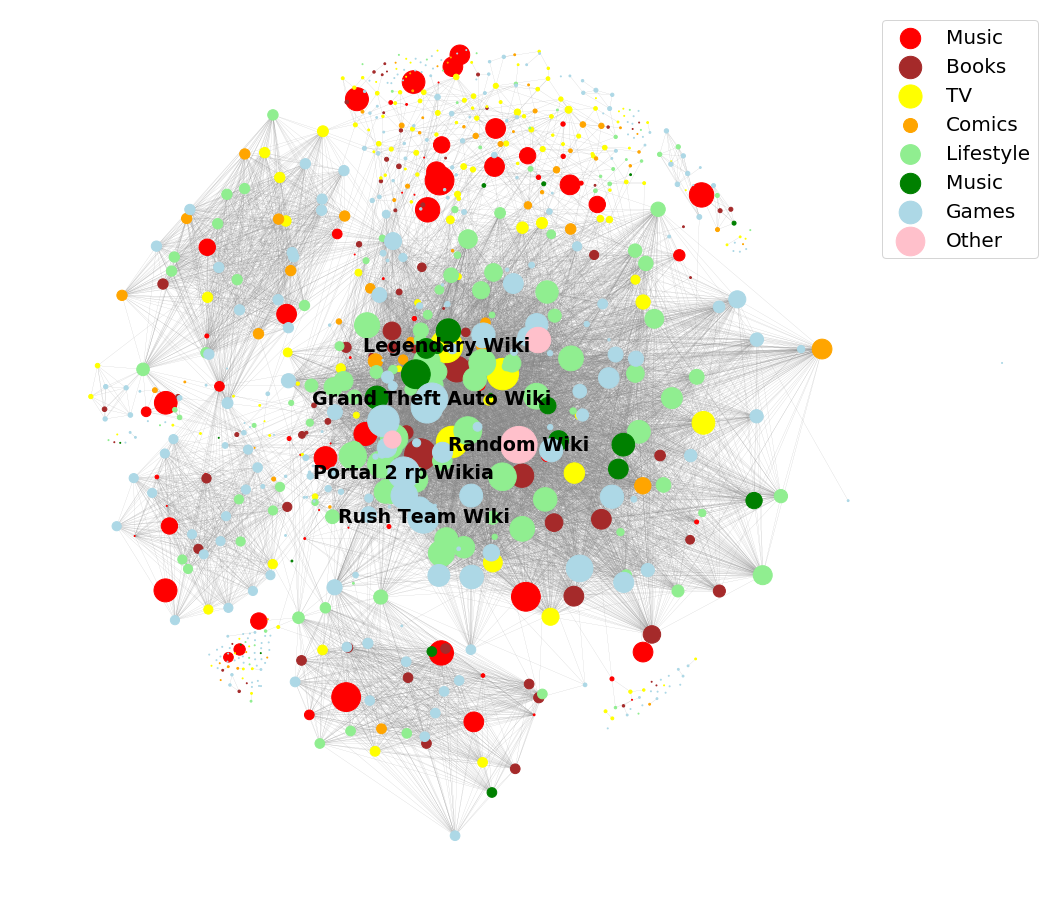

In [294]:
# plot figure
plt.figure(figsize=(18, 16))  

node_size_games = [(G.degree(node, weight='weight')*2.5)+1 for node in G.nodes() if list(G.node[node]['hub'])[0]=='Games']  
node_size_movies = [(G.degree(node, weight='weight')*2.5)+1 for node in G.nodes() if list(G.node[node]['hub'])[0]=='Movies']  
node_size_books = [(G.degree(node, weight='weight')*2.5)+1 for node in G.nodes() if list(G.node[node]['hub'])[0]=='Books']  
node_size_tv = [(G.degree(node, weight='weight')*2.5)+1 for node in G.nodes() if list(G.node[node]['hub'])[0]=='TV']  
node_size_comics = [(G.degree(node, weight='weight')*2.5)+1 for node in G.nodes() if list(G.node[node]['hub'])[0]=='Comics']  
node_size_lifestyle = [(G.degree(node, weight='weight')*2.5)+1 for node in G.nodes() if list(G.node[node]['hub'])[0]=='Lifestyle']  
node_size_other = [(G.degree(node, weight='weight')*2.5)+1 for node in G.nodes() if list(G.node[node]['hub'])[0]=='Other']  
node_size_music = [(G.degree(node, weight='weight')*2.5)+1 for node in G.nodes() if list(G.node[node]['hub'])[0]=='Music']  

labels = {}    
for node in G.nodes():
    if G.degree(node, weight='weight')*2 > 805:
        #set the node name as the key and the label as its value 
        labels[node] = node

node_label = [node for node in G.nodes() ]
nx.draw_networkx_nodes(G, positions, nodelist=nodes['Movies'], node_size=node_size_music,cmap=plt.get_cmap('jet'), node_color='red', label='Music')
nx.draw_networkx_nodes(G, positions, nodelist=nodes['Books'], node_size=node_size_books,cmap=plt.get_cmap('jet'), node_color='brown', label='Books')
nx.draw_networkx_nodes(G, positions, nodelist=nodes['TV'], node_size=node_size_tv,cmap=plt.get_cmap('jet'), node_color='yellow', label='TV')
nx.draw_networkx_nodes(G, positions, nodelist=nodes['Comics'], node_size=node_size_comics,cmap=plt.get_cmap('jet'), node_color='orange', label='Comics')
nx.draw_networkx_nodes(G, positions, nodelist=nodes['Lifestyle'], node_size=node_size_lifestyle,cmap=plt.get_cmap('jet'), node_color='lightgreen', label='Lifestyle')
nx.draw_networkx_nodes(G, positions, nodelist=nodes['Music'], node_size=node_size_music,cmap=plt.get_cmap('jet'), node_color='green', label='Music')
nx.draw_networkx_edges(G, positions, width=0.1, cmap=plt.get_cmap('jet'), edge_color="gray")
nx.draw_networkx_labels(G, positions, labels=labels, font_size=19, font_color='k', font_weight='bold', alpha=2.0)
nx.draw_networkx_nodes(G , positions, nodelist=nodes['Games'], node_size=node_size_games,cmap=plt.get_cmap('jet'), node_color='lightblue', label='Games')
nx.draw_networkx_nodes(G, positions, nodelist=nodes['Other'], node_size=node_size_other,cmap=plt.get_cmap('jet'), node_color='pink', label='Other')


plt.legend(numpoints = 1)
#texts = [plt.text(n, labels[n], ha='center', va='center') for n in G.nodes()]
#adjust_text(texts)#, only_move='y', arrowprops=dict(arrowstyle="->", color='r', lw=0.5))
plt.axis('off')
plt.savefig('graphs/wikiNetworkColor.png')
plt.show()

In [16]:
len(G.edges())

9965

In [17]:
len(G.nodes())

815

In [241]:
# Find degrees according to hub
hubsDegree = {}
maxDegree = 0
for i in range(len(G.nodes)): 
    n = list(G.nodes)[i]
    nodehubs = list(G.node[n]['hub'])
    degree = G.degree(n)#, weight='weight')
    for hub in nodehubs:
        if hub not in hubsDegree:
            hubsDegree[hub] = []
        hubsDegree[hub].append(degree)
    if degree>maxDegree:
        maxDegree = degree

for k, degree in hubsDegree.items():
    print(k, max(degree))

Games 122
Movies 95
Books 110
TV 116
Comics 99
Lifestyle 127
Other 167
Music 125


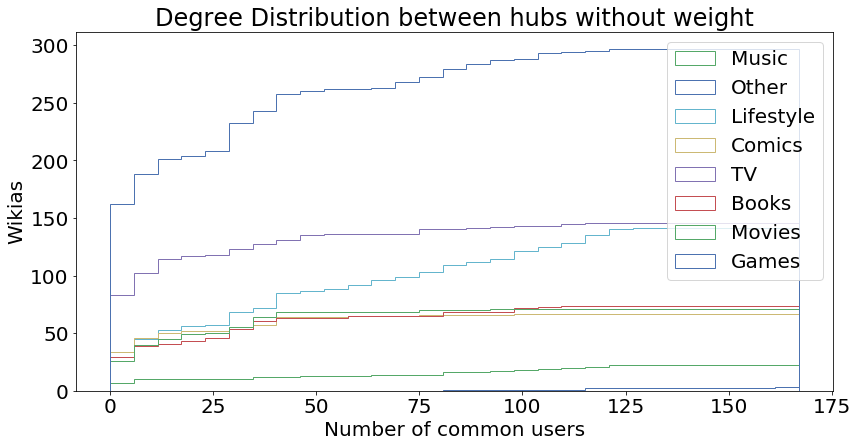

In [177]:
# Create Cumulative Step Histogram 
plt.figure(figsize=(12, 6))  
plt.style.use('seaborn-deep')
bins = np.linspace(0, maxDegree, 30)

plt.hist(list(hubsDegree.values()), 
         bins, 
         label=list(hubsDegree.keys()), 
         histtype='step', 
         cumulative=True)
#patch.linewidth

plt.legend(loc='upper right')
plt.tight_layout()
plt.title("Degree Distribution between hubs without weight")
plt.ylabel("Wikias")
plt.xlabel("Number of common users")
plt.savefig('graphs/wikiDegreeCumulativeHist.png')
plt.show()

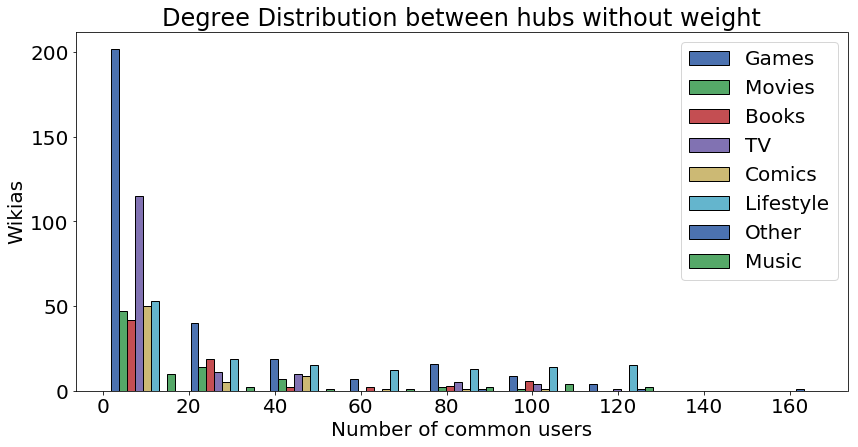

In [178]:
# Create Bin Histogram 
plt.figure(figsize=(12, 6))  
plt.style.use('seaborn-deep')
bins = np.linspace(0, maxDegree, 10)

plt.hist(list(hubsDegree.values()), 
         bins, 
         label=list(hubsDegree.keys()), 
         histtype='bar',
         edgecolor='black')

plt.legend(loc='upper right')
plt.tight_layout()
plt.title("Degree Distribution between hubs without weight")
plt.ylabel("Wikias")
plt.xlabel("Number of common users")
plt.savefig('graphs/wikiDegreeHist.png')
plt.show()

[(0, 148), (1, 96), (2, 57)]


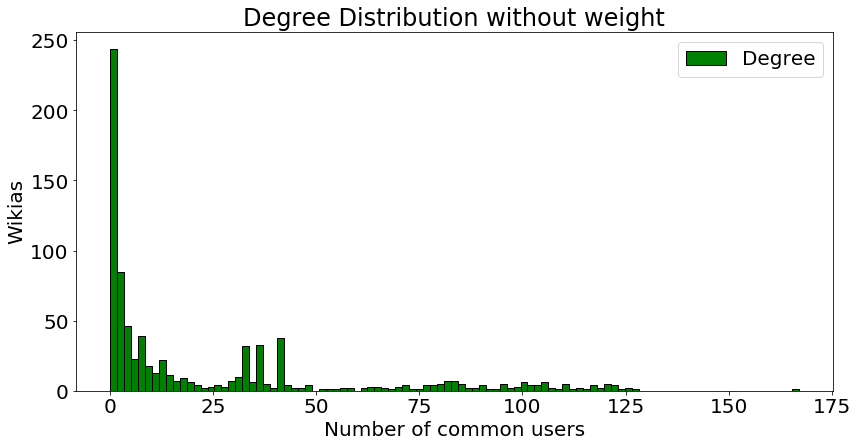

In [179]:
plt.rcParams.update({'font.size': 20})
degrees = [val for (node, val) in G.degree()]
cnt = collections.Counter(degrees)
print(cnt.most_common(3))
# Create Bin Histogram 
plt.figure(figsize=(12, 6))  
plt.style.use('seaborn-deep')
bins = np.linspace(0, max(degrees), 100)

plt.hist(degrees, 
         bins, 
         label="Degree", 
         histtype='bar',
         color='Green',
         edgecolor='black')

plt.legend(loc='upper right')
plt.tight_layout()
plt.title("Degree Distribution without weight")
plt.ylabel("Wikias")
plt.xlabel("Number of common users")
plt.savefig('graphs/wikiDegreeSumHist.png')
plt.show()

[(2, 57), (42, 36), (33, 32)]


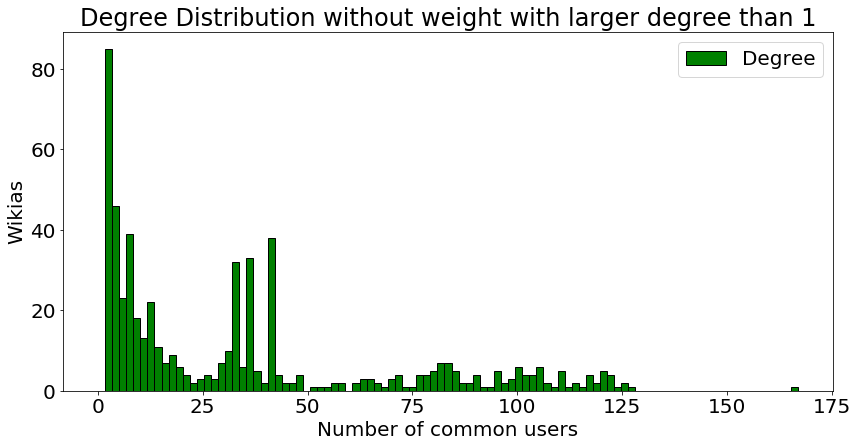

In [180]:
plt.rcParams.update({'font.size': 20})
degrees = [val for (node, val) in G.degree() if val>1]
cnt = collections.Counter(degrees)
print(cnt.most_common(3))
# Create Bin Histogram 
plt.figure(figsize=(12, 6))  
plt.style.use('seaborn-deep')
bins = np.linspace(0, max(degrees), 100)

plt.hist(degrees, 
         bins, 
         label="Degree", 
         histtype='bar',
         color='Green',
         edgecolor='black')

plt.legend(loc='upper right')
plt.tight_layout()
plt.title("Degree Distribution without weight with larger degree than 1")
plt.ylabel("Wikias")
plt.xlabel("Number of common users")
plt.savefig('graphs/wikiDegreelarger1SumHist.png')
plt.show()

[(42, 36), (33, 32), (37, 31)]


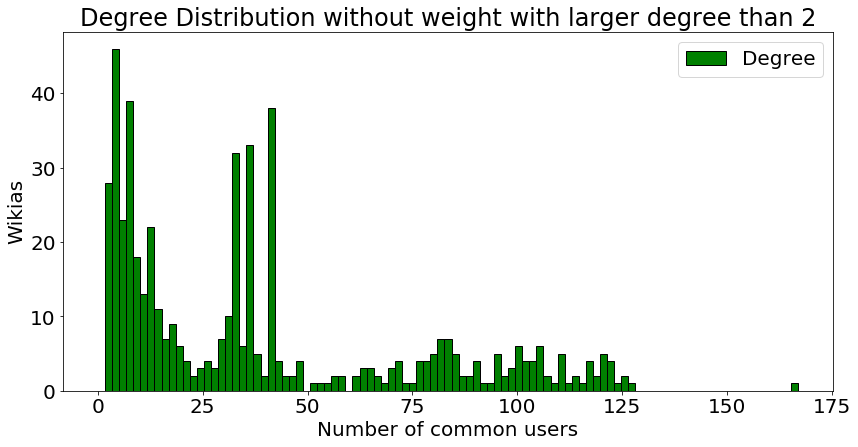

In [181]:
plt.rcParams.update({'font.size': 20})
degrees = [val for (node, val) in G.degree() if val>2]
cnt = collections.Counter(degrees)
print(cnt.most_common(3))
# Create Bin Histogram 
plt.figure(figsize=(12, 6))  
plt.style.use('seaborn-deep')
bins = np.linspace(0, max(degrees), 100)

plt.hist(degrees, 
         bins, 
         label="Degree", 
         histtype='bar',
         color='Green',
         edgecolor='black')

plt.legend(loc='upper right')
plt.tight_layout()
plt.title("Degree Distribution without weight with larger degree than 2")
plt.ylabel("Wikias")
plt.xlabel("Number of common users")
plt.savefig('graphs/wikiDegreelarger2Hist.png')
plt.show()

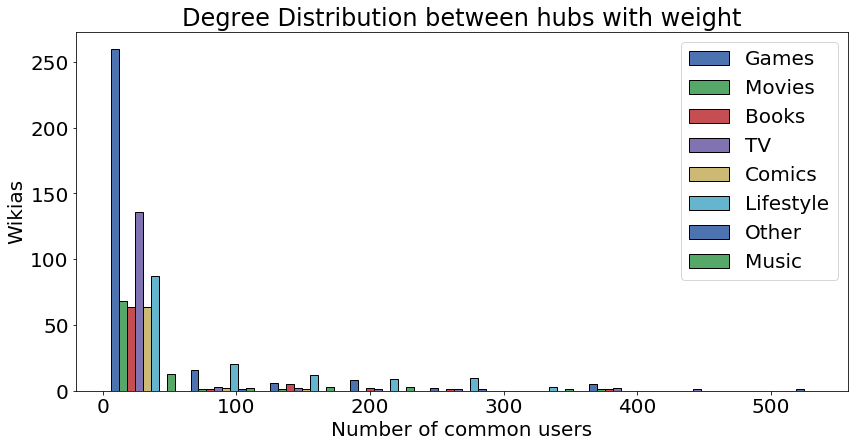

In [182]:
# Find degrees according to hub
hubsDegree = {}
maxDegree = 0
for i in range(len(G.nodes)): 
    n = list(G.nodes)[i]
    nodehubs = list(G.node[n]['hub'])
    degree = G.degree(n, weight='weight')
    for hub in nodehubs:
        if hub not in hubsDegree:
            hubsDegree[hub] = []
        hubsDegree[hub].append(degree)
    if degree>maxDegree:
        maxDegree = degree
    
# Create Bin Histogram 
plt.figure(figsize=(12, 6))  
plt.style.use('seaborn-deep')
bins = np.linspace(0, maxDegree, 10)

plt.hist(list(hubsDegree.values()), 
         bins, 
         label=list(hubsDegree.keys()), 
         histtype='bar',
         edgecolor='black')

plt.legend(loc='upper right')
plt.tight_layout()
plt.title("Degree Distribution between hubs with weight")
plt.ylabel("Wikias")
plt.xlabel("Number of common users")
plt.savefig('graphs/wikiDegreeWeightHist.png')
plt.show()

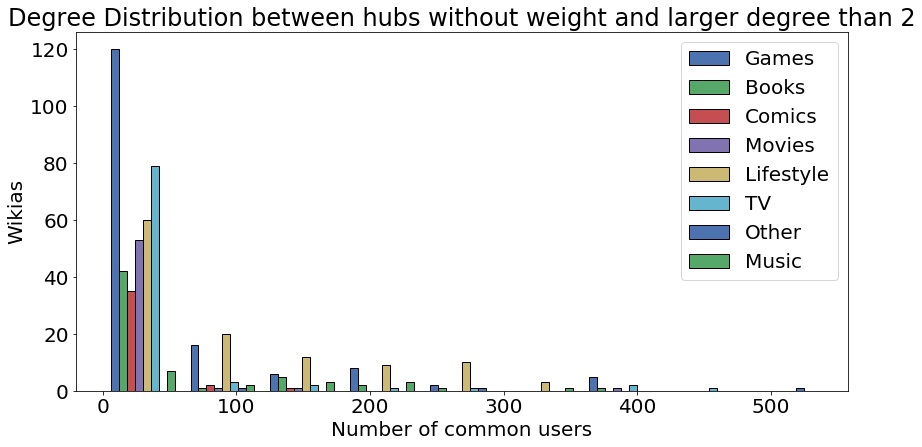

In [183]:
# Find degrees according to hub
hubsDegree = {}
maxDegree = 0
for i in range(len(G.nodes)): 
    n = list(G.nodes)[i]
    nodehubs = list(G.node[n]['hub'])
    degree = G.degree(n, weight='weight')
    if degree > 2:
        for hub in nodehubs:
            if hub not in hubsDegree:
                hubsDegree[hub] = []
            hubsDegree[hub].append(degree)
        if degree>maxDegree:
            maxDegree = degree
    
# Create Bin Histogram 
plt.figure(figsize=(12, 6))  
plt.style.use('seaborn-deep')
bins = np.linspace(0, maxDegree, 10)

plt.hist(list(hubsDegree.values()), 
         bins, 
         label=list(hubsDegree.keys()), 
         histtype='bar',
         edgecolor='black')

plt.legend(loc='upper right')
plt.tight_layout()
plt.title("Degree Distribution between hubs without weight and larger degree than 2")
plt.ylabel("Wikias")
plt.xlabel("Number of common users")
plt.savefig('graphs/wikiDegreelarger2WeightHist.png')
plt.show()

[(0, 148), (1, 89), (2, 59)]


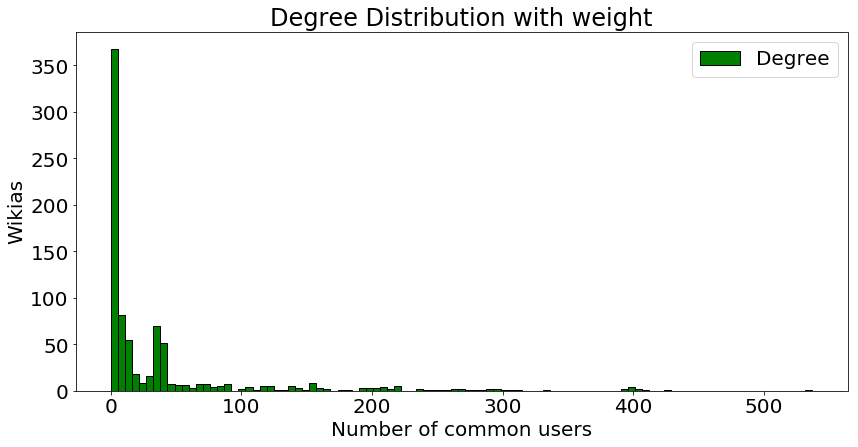

In [185]:
plt.rcParams.update({'font.size': 20})
degrees = [val for (node, val) in G.degree(weight='weight')]
cnt = collections.Counter(degrees)
print(cnt.most_common(3))
# Create Bin Histogram 
plt.figure(figsize=(12, 6))  
plt.style.use('seaborn-deep')
bins = np.linspace(0, max(degrees), 100)

plt.hist(degrees, 
         bins, 
         label="Degree", 
         histtype='bar',
         color='Green',
         edgecolor='black')

plt.legend(loc='upper right')
plt.tight_layout()
plt.title("Degree Distribution with weight")
plt.ylabel("Wikias")
plt.xlabel("Number of common users")
plt.savefig('graphs/wikiDegreeSumWeightHist.png')
plt.show()

[(2, 59), (42, 36), (37, 30)]


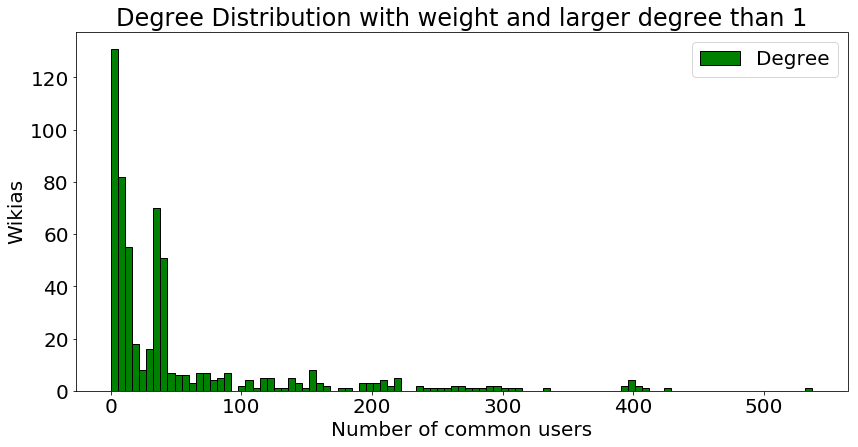

In [188]:
plt.rcParams.update({'font.size': 20})
degrees = [val for (node, val) in G.degree(weight='weight') if val>1]
cnt = collections.Counter(degrees)
print(cnt.most_common(3))
# Create Bin Histogram 
plt.figure(figsize=(12, 6))  
plt.style.use('seaborn-deep')
bins = np.linspace(0, max(degrees), 100)

plt.hist(degrees, 
         bins, 
         label="Degree", 
         histtype='bar',
         color='Green',
         edgecolor='black')

plt.legend(loc='upper right')
plt.tight_layout()
plt.title("Degree Distribution with weight and larger degree than 1")
plt.ylabel("Wikias")
plt.xlabel("Number of common users")
plt.savefig('graphs/wikiDegreeSumlarger1WeightHist.png')
plt.show()

In [195]:
# Data memory usage
sum(activeDataSet.memory_usage(index=False, deep=True))

1708604

TypeError: tuple indices must be integers or slices, not str